# CA 1 - Project: Machine Learning for Business

To start this project, I will gather at the beginning all the libraries used to manipulate data, create visualizations, and develop and deploy machine learning models (ML).

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Preparation

## Exploratory Data Analysis (EDA):

### Importing dataset and knowing data structure

The method 'pd.read_csv' was used to access the CSV file containing the dataset. Then, I used the method '.head()' to visualize the data, followed by the method '.shape' to determine the dataset size. I found that this dataset has 8370 rows and 13 columns.

In [2]:
df = pd.read_csv("CourseraDataset-Clean.csv")
df.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


In [3]:
df.shape

(8370, 13)

The property '.dtypes' returns a Series with the data type of each column. Thus, we have ten object columns, two floats and one integer.   

In [4]:
df.dtypes

Course Title                       object
Rating                            float64
Level                              object
Schedule                           object
What you will learn                object
Skill gain                         object
Modules                            object
Instructor                         object
Offered By                         object
Keyword                            object
Course Url                         object
Duration to complete (Approx.)    float64
Number of Review                    int64
dtype: object

The '.describe()' tool generates descriptive statistics from the dataset. Comparing the mean and median values (50% value) revealed a skewed distribution in all columns. Thus, rescaling the data before applying the clustering models will be necessary because there is a considerable variation between features that can contribute to inaccurate predictions (Müller and Guido, 2017, p.138).

In [5]:
df.describe()

,Rating,Duration to complete (Approx.),Number of Review
count,8370.000000,8370.000000,8370.000000
mean,4.005974,29.245968,2044.256631
std,1.623430,39.899608,10265.366839
min,0.000000,1.000000,0.000000
25%,4.500000,10.000000,32.000000
50%,4.700000,16.000000,213.000000
75%,4.800000,32.000000,1025.000000
max,5.000000,480.000000,225830.000000


### Cleaning data

I will remove certain columns that are specific to each student record or report and thus do not provide useful information in this case, such as 'What you will learn' and 'Instructor'. This practice can help streamline the dataset, reduce noise, and focus on the relevant variables, which can lead to more accurate and insightful analyses.  

In [6]:
columns_to_drop = ['What you will learn', 'Skill gain', 'Modules', 'Instructor', 'Course Url']
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df.head()

,Course Title,Rating,Level,Schedule,Offered By,Keyword,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,The Museum of Modern Art,Arts and Humanities,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,University of Illinois at Urbana-Champaign,Arts and Humanities,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Michigan State University,Arts and Humanities,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,SAE Institute México,Arts and Humanities,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,University of Rochester,Arts and Humanities,11.0,582


In [8]:
df.dtypes

Course Title                       object
Rating                            float64
Level                              object
Schedule                           object
Offered By                         object
Keyword                            object
Duration to complete (Approx.)    float64
Number of Review                    int64
dtype: object

#### Checking for missing values

Although the source I got the dataset from reports that it is clean, I will certify this by looking for missing values and duplicates and doing imputation if necessary.

I used the '.info()' and '.isnull().sum()' to verify the presence of missing values (null and NaN). It returned that there are zero missing points, thus no further action will be necessary in this case.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8370 non-null   object 
 1   Rating                          8370 non-null   float64
 2   Level                           8370 non-null   object 
 3   Schedule                        8370 non-null   object 
 4   Offered By                      8370 non-null   object 
 5   Keyword                         8370 non-null   object 
 6   Duration to complete (Approx.)  8370 non-null   float64
 7   Number of Review                8370 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 523.3+ KB


In [10]:
df.isnull().sum()

Course Title                      0
Rating                            0
Level                             0
Schedule                          0
Offered By                        0
Keyword                           0
Duration to complete (Approx.)    0
Number of Review                  0
dtype: int64

Then, I checked for duplicates using the '.duplicated().sum()' tool, and there were no duplicates in this dataset.

In [11]:
df.duplicated().sum()

0

#### Checking for outliers

Based on my previous observations, this dataset appears skewed, suggesting the presence of potential outliers. To assess this, I will calculate the Interquartile Range (IQR) using the first and third quartile values. Subsequently, I will employ a boxplot graphic to visualize certain features. Finally, I will identify and, if necessary, remove any outliers that do not compromise the integrity of the dataset.

In [12]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

In [13]:
df1 = df[~((df<(Q1-1.5*IQR))|(df>Q3+1.5*IQR)).any(axis=1)]
df1.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_31268\2878438525.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[~((df<(Q1-1.5*IQR))|(df>Q3+1.5*IQR)).any(axis=1)]


(5308, 8)

In [14]:
df2 = df[~((df<(Q1-2*IQR))|(df>Q3+2*IQR)).any(axis=1)]
df2.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_31268\2792884971.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df[~((df<(Q1-2*IQR))|(df>Q3+2*IQR)).any(axis=1)]


(5510, 8)

In [15]:
df3 = df[~((df<(Q1-3*IQR))|(df>Q3+3*IQR)).any(axis=1)]
df3.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_31268\1060118342.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df[~((df<(Q1-3*IQR))|(df>Q3+3*IQR)).any(axis=1)]


(6159, 8)

 #### Boxplot graphic to visualize outliers

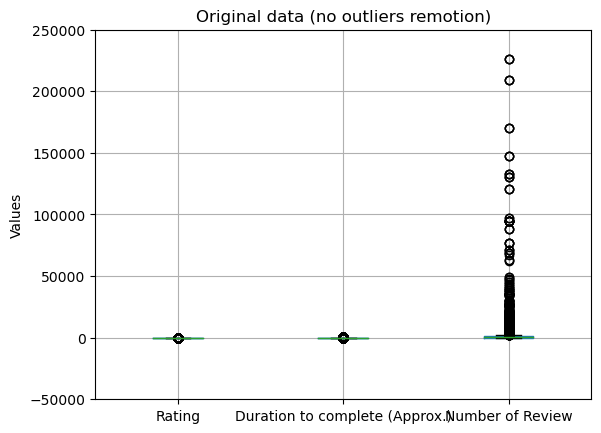

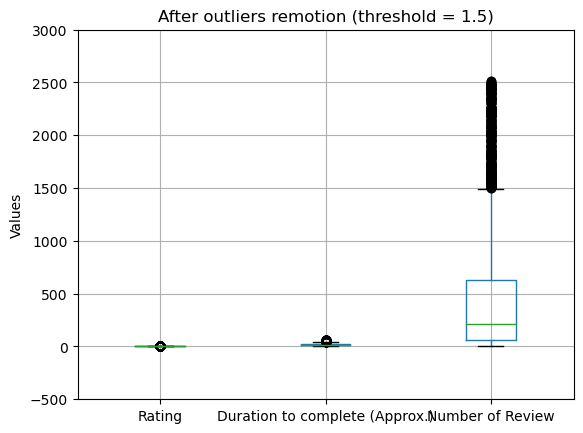

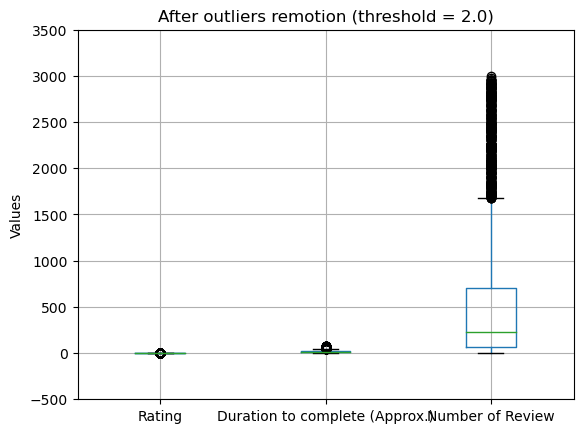

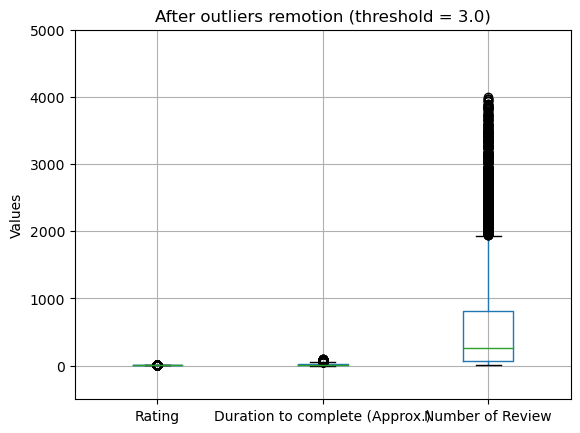

In [16]:
df.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-50000, top=250000)
plt.title('Original data (no outliers remotion)')
plt.ylabel('Values')
plt.show()

df1.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-500, top=3000)
plt.title('After outliers remotion (threshold = 1.5)')
plt.ylabel('Values')
plt.show()

df2.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-500, top=3500)
plt.title('After outliers remotion (threshold = 2.0)')
plt.ylabel('Values')
plt.show()

df3.boxplot(column=['Rating', 'Duration to complete (Approx.)', 'Number of Review'])
plt.ylim(bottom=-500, top=5000)
plt.title('After outliers remotion (threshold = 3.0)')
plt.ylabel('Values')
plt.show()

After applying three different thresholds (1.5, 2.0, and 3.0), I obtained the minimum amount of data removal, which would be 26.4% of the data. This is a considerable amount that might compromise the integrity of the data. Furthermore, the variables 'Rating' and 'Duration to complete (Approx.)' did not present outliers. This occurrence only affected the variable 'Number of Reviews,' which I need to be careful with when working with it. Therefore, I will not remove outliers.

## Data Preprocessing

Data preprocessing is crucial to the success of both supervised and unsupervised learning because this step can facilitate data computation more efficiently (Müller and Guido, 2017, p.138, 208).

Before choosing which method to use for scaling the data, I will check the data's sparsity because it provides information about the more suitable scaling method.

### Sparsity of the data
Sparse datasets are characterized by most features having 0 most of the time (Müller and Guido, 2017, p.44) and the sparsity is a measurement of how sparse or dense a dataset is. It can be represented as the ratio of the number of zero or missing values to the total number of data points or entries in the dataset. 

In [17]:
missing_values = df.isnull().sum().sum()
zero_values = (df == 0).sum().sum()

total_data_points = df.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.3f}")

Sparsity of the dataset: 0.035


The sparsity values must be between 0 and 1 when 0 indicates no sparsity, and 1 indicates completely spaced. The result for this dataset was found to be 0.035, meaning that the dataset sparcity is relatively low. Thus, this data does not have a significant portion of missing or zero values.

Therefore, considering that the data is not sparse but skewed, using the MinMax Scaler is more suitable in this case. This practice is indicated for many algorithms sensitive to data scaling (Müller and Guido, 2017, p.132).

### Data Scaling

The use of a data scaler is common preprocessing for many ML models. Considering the results obtained above, which indicate that the data is skewed and not sparse, Min-Max Scaling appears to be the most suitable option in this situation.

To start, I will specify the numerical columns that I will scale, and then use the sklearn.preprocessing package to access the MinMaxScaler to transform the data.

In [18]:
columns_to_scale = ['Rating', 'Duration to complete (Approx.)', 'Number of Review']
df_subset = df[columns_to_scale]

In [19]:
df_subset.head()

,Rating,Duration to complete (Approx.),Number of Review
0,4.8,20.0,2813
1,4.4,34.0,100
2,4.5,9.0,227
3,0.0,8.0,0
4,4.8,11.0,582


In [20]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_subset)
print(df_scaled)

[[9.60000000e-01 3.96659708e-02 1.24562724e-02]
 [8.80000000e-01 6.88935282e-02 4.42810964e-04]
 [9.00000000e-01 1.67014614e-02 1.00518089e-03]
 ...
 [0.00000000e+00 1.67014614e-02 0.00000000e+00]
 [0.00000000e+00 3.75782881e-02 0.00000000e+00]
 [0.00000000e+00 2.08768267e-03 0.00000000e+00]]


I will now convert the array df_scaled into a dataframe (df_scaled1), and then concatenate df_scaled1 with df.

In [21]:
columns = ["rating", "duration_complete", "number_review"]
df_scaled1 = pd.DataFrame(df_scaled, columns=columns)
df_scaled1.head()

,rating,duration_complete,number_review
0,0.96,0.039666,0.012456
1,0.88,0.068894,0.000443
2,0.90,0.016701,0.001005
3,0.00,0.014614,0.000000
4,0.96,0.020877,0.002577


In [22]:
combined_df = pd.concat([df_scaled1, df], axis=1)
combined_df.head()

,rating,duration_complete,number_review,Course Title,Rating,Level,Schedule,Offered By,Keyword,Duration to complete (Approx.),Number of Review
0,0.96,0.039666,0.012456,Fashion as Design,4.8,Beginner level,Flexible schedule,The Museum of Modern Art,Arts and Humanities,20.0,2813
1,0.88,0.068894,0.000443,Modern American Poetry,4.4,Beginner level,Flexible schedule,University of Illinois at Urbana-Champaign,Arts and Humanities,34.0,100
2,0.90,0.016701,0.001005,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Michigan State University,Arts and Humanities,9.0,227
3,0.00,0.014614,0.000000,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,SAE Institute México,Arts and Humanities,8.0,0
4,0.96,0.020877,0.002577,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,University of Rochester,Arts and Humanities,11.0,582


In [23]:
data = combined_df.drop(["Rating", "Duration to complete (Approx.)", "Number of Review"], axis=1)
data.head()  

,rating,duration_complete,number_review,Course Title,Level,Schedule,Offered By,Keyword
0,0.96,0.039666,0.012456,Fashion as Design,Beginner level,Flexible schedule,The Museum of Modern Art,Arts and Humanities
1,0.88,0.068894,0.000443,Modern American Poetry,Beginner level,Flexible schedule,University of Illinois at Urbana-Champaign,Arts and Humanities
2,0.90,0.016701,0.001005,Pixel Art for Video Games,Beginner level,Flexible schedule,Michigan State University,Arts and Humanities
3,0.00,0.014614,0.000000,Distribución digital de la música independiente,Beginner level,Flexible schedule,SAE Institute México,Arts and Humanities
4,0.96,0.020877,0.002577,The Blues: Understanding and Performing an Ame...,Beginner level,Flexible schedule,University of Rochester,Arts and Humanities


I checked again for missing values after the concatenation and found that there are no missing values.

In [24]:
data.shape

(8370, 8)

In [25]:
data.isnull().sum()

rating               0
duration_complete    0
number_review        0
Course Title         0
Level                0
Schedule             0
Offered By           0
Keyword              0
dtype: int64

# ML models

In [26]:
data

,rating,duration_complete,number_review,Course Title,Level,Schedule,Offered By,Keyword
0,0.96,0.039666,0.012456,Fashion as Design,Beginner level,Flexible schedule,The Museum of Modern Art,Arts and Humanities
1,0.88,0.068894,0.000443,Modern American Poetry,Beginner level,Flexible schedule,University of Illinois at Urbana-Champaign,Arts and Humanities
2,0.90,0.016701,0.001005,Pixel Art for Video Games,Beginner level,Flexible schedule,Michigan State University,Arts and Humanities
3,0.00,0.014614,0.000000,Distribución digital de la música independiente,Beginner level,Flexible schedule,SAE Institute México,Arts and Humanities
4,0.96,0.020877,0.002577,The Blues: Understanding and Performing an Ame...,Beginner level,Flexible schedule,University of Rochester,Arts and Humanities
...,...,...,...,...,...,...,...,...
8365,0.98,0.027140,0.000133,Architecting with Google Kubernetes Engine: Pr...,Intermediate level,Flexible schedule,Google Cloud,Social Sciences
8366,0.00,0.020877,0.000000,Computational Thinking for K-12 Educators: Nes...,Beginner level,Flexible schedule,University of California San Diego,Social Sciences
8367,0.00,0.016701,0.000000,Cómo combinar y analizar datos complejos,Not specified,Flexible schedule,"University of Maryland, College Park",Social Sciences
8368,0.00,0.037578,0.000000,Architecting with Google Kubernetes Engine: Wo...,Intermediate level,Flexible schedule,Google Cloud,Social Sciences


## DBSCAN Clustering

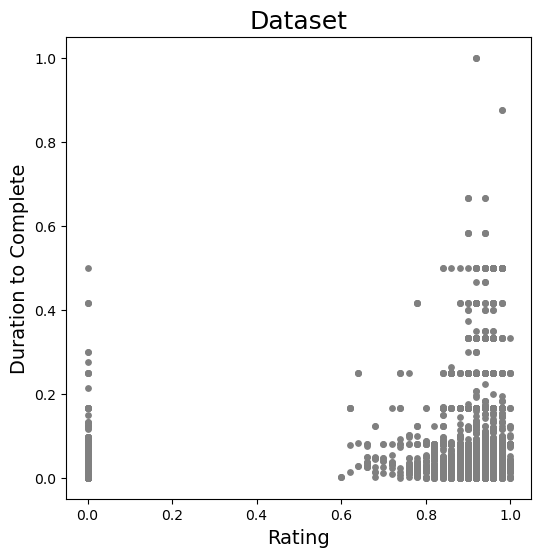

In [28]:
# Draw a scatter plot for the dataframe (data) without clustering
plt.figure(figsize = (6, 6))
plt.scatter(data['rating'], data['duration_complete'], s = 15, color = 'grey')
plt.title('Dataset',fontsize = 18)
plt.xlabel('Rating',fontsize = 14)
plt.ylabel('Duration to Complete',fontsize = 14)
plt.show()

In [29]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data[['rating', 'duration_complete']])

DBSCAN()

In [30]:
# Add another column into the dataframe (df)
data['DBSCAN_labels'] = dbscan.labels_ 
data.head()

,rating,duration_complete,number_review,Course Title,Level,Schedule,Offered By,Keyword,DBSCAN_labels
0,0.96,0.039666,0.012456,Fashion as Design,Beginner level,Flexible schedule,The Museum of Modern Art,Arts and Humanities,0
1,0.88,0.068894,0.000443,Modern American Poetry,Beginner level,Flexible schedule,University of Illinois at Urbana-Champaign,Arts and Humanities,0
2,0.90,0.016701,0.001005,Pixel Art for Video Games,Beginner level,Flexible schedule,Michigan State University,Arts and Humanities,0
3,0.00,0.014614,0.000000,Distribución digital de la música independiente,Beginner level,Flexible schedule,SAE Institute México,Arts and Humanities,1
4,0.96,0.020877,0.002577,The Blues: Understanding and Performing an Ame...,Beginner level,Flexible schedule,University of Rochester,Arts and Humanities,0


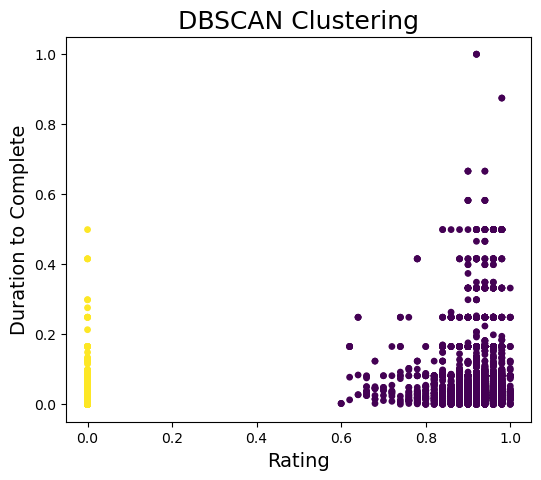

In [32]:
plt.figure(figsize=(6, 5))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['DBSCAN_labels'], cmap='viridis', s=15)
plt.title('DBSCAN Clustering', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Duration to Complete', fontsize=14)
plt.show()

In [34]:
# Finding optmum epsilon
from sklearn.neighbors import NearestNeighbors
# Initialise an object nn by calling a method NearestNeighbors()
nn = NearestNeighbors(n_neighbors = 2)
# Train the model by calling a method fit()
nbrs = nn.fit(data[['rating', 'duration_complete']])
# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(data[['rating', 'duration_complete']])
print(distances, indices)

[[0.         0.        ]
 [0.         0.00417537]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]] [[  77    0]
 [   1 5198]
 [ 215    2]
 ...
 [ 436  194]
 [ 383  295]
 [ 437  411]]


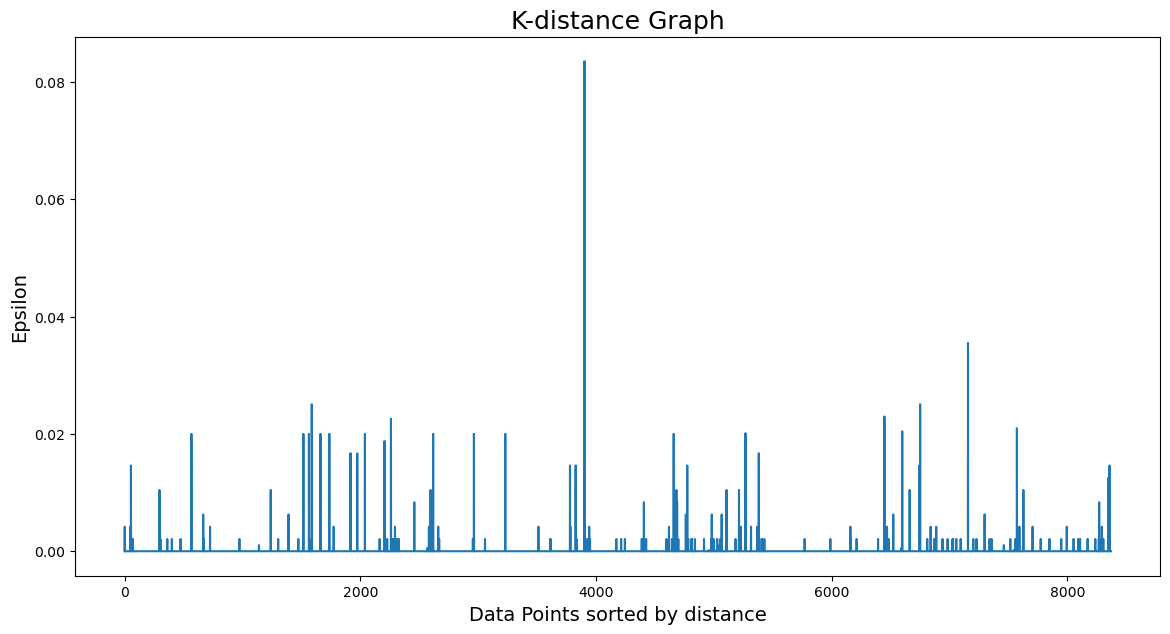

In [35]:
# Plotting K-distance Graph
distances = distances[:, 1]
plt.figure(figsize = (14, 7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 18)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [39]:
# Using the optmum epsilon
# Initialise an object by calling a method DBSCAN along with parameters as eps and min_samples
dbscan_opt = DBSCAN(eps = 0.02, min_samples = 5)

# Train the model by calling a method fit()
dbscan_opt.fit(data[['rating', 'duration_complete']])

DBSCAN(eps=0.02)

In [40]:
# Add another column into the dataframe (df)
data['DBSCAN_opt_labels'] = dbscan_opt.labels_

data['DBSCAN_opt_labels'].value_counts()

 0     3617
 1     1921
 2     1150
 3      721
 7      270
 6      114
-1       89
 12      70
 13      54
 10      39
 17      34
 15      33
 8       26
 19      26
 20      26
 16      25
 9       24
 5       20
 18      18
 11      15
 25      12
 21      10
 29       9
 27       8
 14       7
 23       6
 26       6
 22       5
 24       5
 4        5
 28       5
Name: DBSCAN_opt_labels, dtype: int64

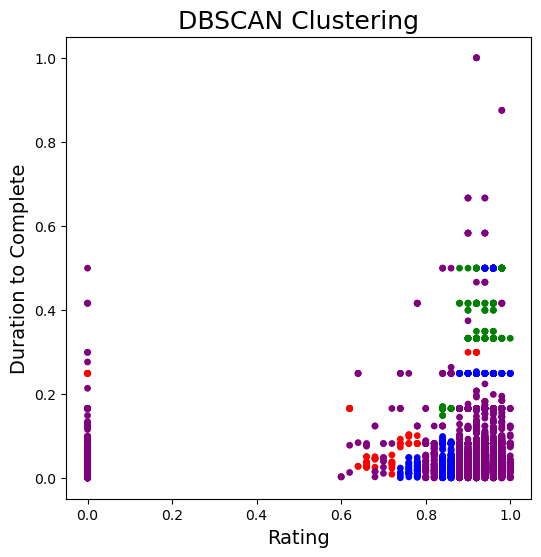

In [41]:
import matplotlib.colors
# Plotting the resulting clusters
colors = ['purple','blue','green', 'red']
plt.figure(figsize = (6, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['DBSCAN_opt_labels'], cmap = matplotlib.colors.ListedColormap(colors), s = 15)
plt.title('DBSCAN Clustering', fontsize = 18)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Duration to Complete', fontsize = 14)
plt.show()

In [43]:
# Finding the optimum clustering parameters

from sklearn.metrics import silhouette_score, davies_bouldin_score


db_param_options = [[0.02,3],[0.02,4],[0.02,5],[0.05,3],[0.05,4],[0.05,5],[0.1,3],[0.1,4],[0.1,5],[0.2,3],[0.2,4],[0.2,5],[0.3,3],[0.3,4],[0.3,5]]
for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit(data[['rating', 'duration_complete']])
    labels = db.labels_
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(data[['rating', 'duration_complete']], labels), davies_bouldin_score(data[['rating', 'duration_complete']], labels))

Eps:  0.02 Min Samples:  3
DBSCAN Clustering:  0.27434789812819205 1.7168888139561538
Eps:  0.02 Min Samples:  4
DBSCAN Clustering:  0.2683301973383159 1.4787034501481768
Eps:  0.02 Min Samples:  5
DBSCAN Clustering:  0.2790688179762648 1.392366417946974
Eps:  0.05 Min Samples:  3
DBSCAN Clustering:  0.6528449120674066 1.0926348524543743
Eps:  0.05 Min Samples:  4
DBSCAN Clustering:  0.6565359958369061 1.2528262916675812
Eps:  0.05 Min Samples:  5
DBSCAN Clustering:  0.7484726339674856 1.0856626842145798
Eps:  0.1 Min Samples:  3
DBSCAN Clustering:  0.7556458359690696 0.127096945304243
Eps:  0.1 Min Samples:  4
DBSCAN Clustering:  0.7556157262597035 0.15183182236644444
Eps:  0.1 Min Samples:  5
DBSCAN Clustering:  0.8810462804416771 0.7302522640692387
Eps:  0.2 Min Samples:  3
DBSCAN Clustering:  0.8916141038340311 0.1331527242274775
Eps:  0.2 Min Samples:  4
DBSCAN Clustering:  0.8916141038340311 0.1331527242274775
Eps:  0.2 Min Samples:  5
DBSCAN Clustering:  0.8916141038340311 0.133

In [44]:
data['Keyword'].value_counts()

Health                              986
Computer Science                    980
DataScience                         964
Social Sciences                     962
Personal Development                936
Business                            935
Information Technology              852
Physical Science and Engineering    799
Math and Logic                      480
Arts and Humanities                 476
Name: Keyword, dtype: int64

### OPTICS

### ARIMA

### Forecast

# References

Müller, A. C. and Guido, S. (2017). *Introduction to machine learning with Python: a guide for data scientists*. 1st ed. United States of America. O’reilly Media.